<a href="https://colab.research.google.com/github/arishp/veltech_genai_images/blob/main/diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from diffusers import StableDiffusionPipeline

Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.


In [2]:
# Check for GPU availability
from google.colab import userdata
hf_token = userdata.get('HF_TOKEN')

device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using device: {device}")

try:
    # Load the pipeline
    model_id = "OFA-Sys/small-stable-diffusion-v0"
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16 if device == "cuda" else torch.float32, token=hf_token)
    pipe = pipe.to(device)

    # Recommended for Mac (MPS) to avoid some memory issues
    if device == "mps":
         pipe.enable_attention_slicing()

    print("Model loaded successfully.")
except Exception as e:
    print(f"An error occurred loading the model: {e}")

Using device: cuda


model_index.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'predict_epsilon': True} were passed to DPMSolverMultistepScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a47a81e7543cd01c1a8140/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a47a81e7543cd01c1a8140/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


Loading weights:   0%|          | 0/196 [00:00<?, ?it/s]

CLIPTextModel LOAD REPORT from: /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a47a81e7543cd01c1a8140/text_encoder
Key                                | Status     |  | 
-----------------------------------+------------+--+-
text_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a47a81e7543cd01c1a8140/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a47a81e7543cd01c1a8140/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


Loading weights:   0%|          | 0/396 [00:00<?, ?it/s]

StableDiffusionSafetyChecker LOAD REPORT from: /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a47a81e7543cd01c1a8140/safety_checker
Key                                               | Status     |  | 
--------------------------------------------------+------------+--+-
vision_model.vision_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
/usr/local/lib/python3.12/dist-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py:223: FutureWarning: The configuration file of this scheduler: DPMSolverMultistepScheduler {
  "_class_name": "DPMSolverMultistepScheduler",
  "_diffusers_version": "0.36.0",
  "algorithm_type": "dpmsolver++",
  "beta_end": 0.012,
  "beta_schedule": "scaled_linear",
  "beta_start": 0.00085,
  "dynamic_thresholding_ratio": 0.995,
  "euler_at_final": false,
  "final_sigmas_type": "

Model loaded successfully.


In [3]:
def generate_image(prompt, save_path="generated_image.png"):
    """
    Generates an image from a text prompt using the loaded Stable Diffusion pipeline.

    Args:
        prompt (str): The text prompt to generate the image from.
        save_path (str): The path to save the generated image.
    """
    try:
        # Generate the image
        print(f"Generating image for prompt: '{prompt}'")
        # Note: pipe is accessed from the global scope of the notebook
        image = pipe(prompt).images[0]

        # Save the image
        image.save(save_path)
        print(f"Image saved to {save_path}")
        return image

    except Exception as e:
        print(f"An error occurred during generation: {e}")
        return None

Generating image for prompt: 'a photo of an astronaut riding a horse on mars'


  0%|          | 0/50 [00:00<?, ?it/s]

Image saved to generated_image.png


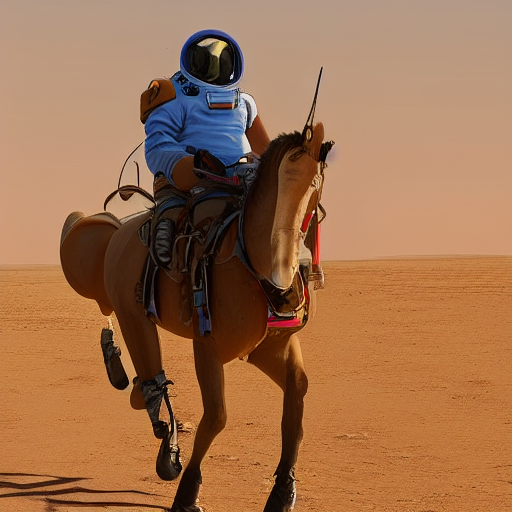

In [4]:
prompt = "a photo of an astronaut riding a horse on mars"
image = generate_image(prompt)

# Display the image in the notebook if generated
if image:
    # Creating a thumbnail for display if needed, or just showing usage
    display(image)